In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error
import os
import sys
import math
import seaborn as sns

parent_dir = os.path.dirname(os.path.realpath('../analysis'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis
from analysis.model_assessment import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error:  0.8974069600921233
R-Squared of Fit:  0.47109184270168425


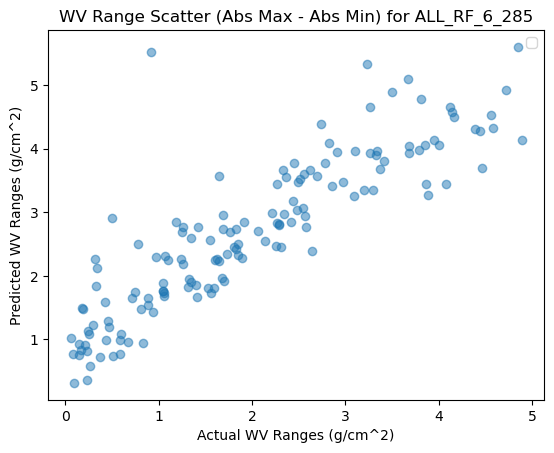

In [26]:
path = '../../model_results/second_run/all_rf_6_285.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']
plot_range_scatter(y_test, y_pred, path, 'absolute')

Mean Squared Error:  0.05486026897843169
R-Squared of Fit:  -9.525542353833076


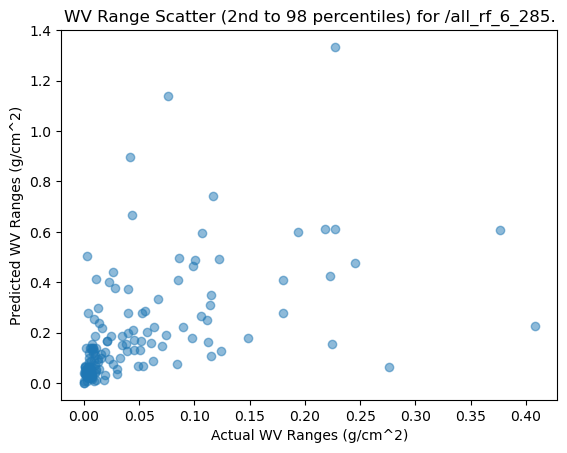

In [21]:
path = '../../model_results/second_run/all_rf_6_285.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']

model_name = '/all_rf_6_285.'

crosstrack_pixel_length = 1242
num_test_scenes = math.floor(y_test.shape[0] / crosstrack_pixel_length)
y_test = y_test.reshape((num_test_scenes, crosstrack_pixel_length))
y_pred = y_pred.reshape((num_test_scenes, crosstrack_pixel_length))

test_2 = np.percentile(y_test, 0.01, axis=1)
pred_2 = np.percentile(y_pred, 0.01, axis=1)
test_98 = np.percentile(y_test, 0.99, axis=1)
pred_98 = np.percentile(y_pred, 0.99, axis=1)
    
test_ranges = np.subtract(test_98, test_2)
pred_ranges = np.subtract(pred_98, pred_2)

title = 'WV Range Scatter (2nd to 98 percentiles) for ' + model_name

  

mse = mean_squared_error(test_ranges, pred_ranges)
r2 = r2_score(test_ranges, pred_ranges)
print('Mean Squared Error: ', mse)
print('R-Squared of Fit: ', r2)

    #m, b = np.polyfit(test_ranges, pred_ranges, 1)
    #plt.plot(test_ranges, m*test_ranges+b)
plt.scatter(test_ranges, pred_ranges, alpha = 0.5)
plt.title(title);
#plt.xlim(0,0.1)
#plt.ylim(0, 0.1)
plt.xlabel('Actual WV Ranges (g/cm^2)');
plt.ylabel('Predicted WV Ranges (g/cm^2)');

In [1]:
path = '../../model_results/first_run/all_dt_5.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']
plot_range_scatter(y_test, y_pred, path, 'percentile')

NameError: name 'np' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error:  0.051081492123856514
R-Squared of Fit:  -9.096395099462734


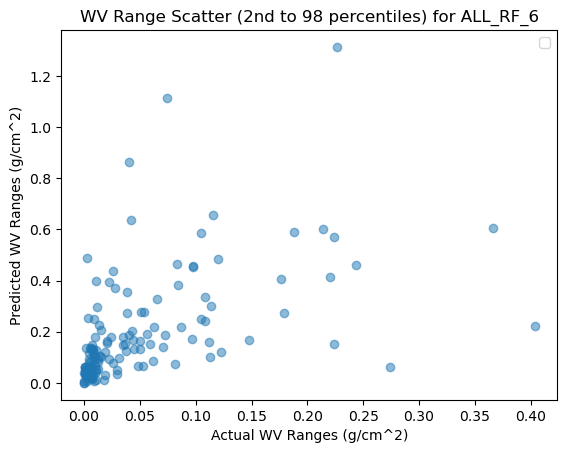

In [5]:
path = '../../model_results/first_run/all_rf_6.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']
plot_range_scatter(y_test, y_pred, path, 'percentile')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error:  0.0468928135189091
R-Squared of Fit:  -7.3925354427994225


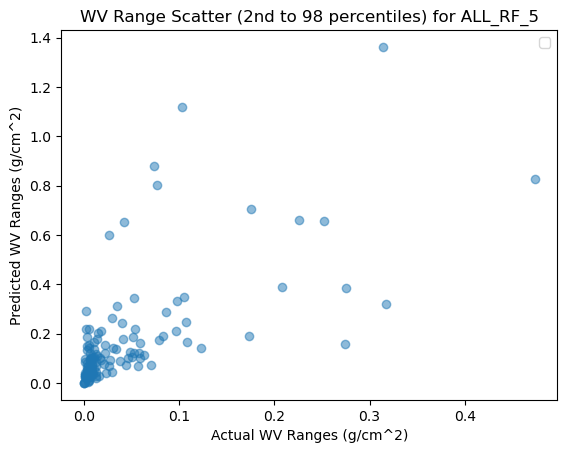

In [6]:
path = '../../model_results/first_run/all_rf_5.npz'
data = np.load(path)
y_pred, y_test, y_train = data['arr_0'], data['arr_1'], data['arr_2']
plot_range_scatter(y_test, y_pred, path, 'percentile')